# HW Problem Set 2 Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib ipympl

## Problem 5

In [2]:
# Define the complex function f_eps(z)
def f_eps(z, epsilon):
    return epsilon / (epsilon**2 + z**2)

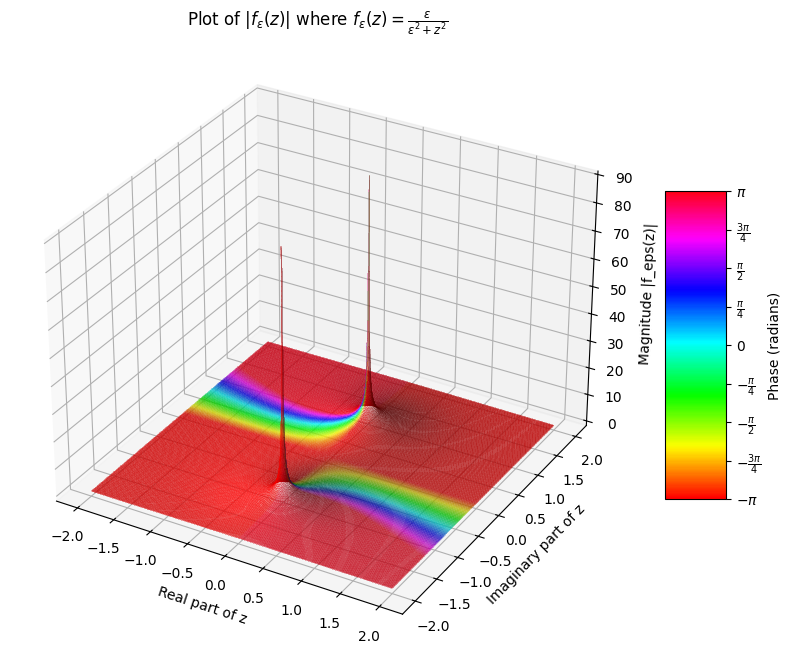

In [3]:
# Define the value of epsilon
epsilon = 1  # You can adjust this value
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-2, 2, 400)  # Real part
y = np.linspace(-2, 2, 400)  # Imaginary part
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = f_eps(Z, epsilon)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax.plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax.set_xlabel('Real part of z')
ax.set_ylabel('Imaginary part of z')
ax.set_zlabel('Magnitude |f_eps(z)|')

# Add a color bar to map the color to the phase
# m = plt.cm.ScalarMappable(cmap=plt.cm.hsv)
# m.set_array(phase)
# plt.colorbar(m, shrink=0.5, aspect=5, label="Phase (radians)")
# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label="Phase (radians)")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)

plt.title(r'Plot of $|f_\epsilon(z)|$ where $f_\epsilon(z)=\frac{\epsilon}{\epsilon^2 + z^2}$')

plt.show()


## Problem 6

In [4]:
def real_exp_xy(x, y):
    return np.exp(x)*np.cos(y)

def im_exp_xy(x, y):
    return np.exp(x)*np.sin(y)

def exp_z(z):
    return np.exp(z)

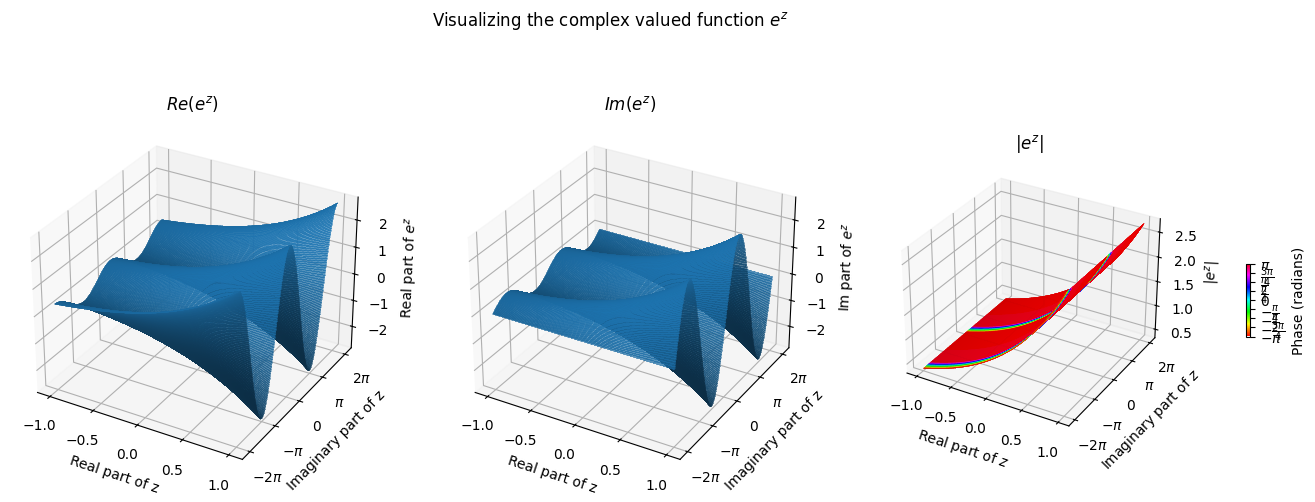

In [14]:
# %matplotlib ipympl
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv
res = 400

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-1, 1, res)  # Real part
y = np.linspace(-2*np.pi, 2*np.pi, res)  # Imaginary part
X, Y = np.meshgrid(x, y)

x_ticks = np.arange(-1, 1.5, 0.5)
y_ticks = np.arange(-2*np.pi, 5*np.pi/2, np.pi)
y_labels = [
    r"$-2\pi$",
    r"$-\pi$",
    r"$0$",
    r"$\pi$",
    r"$2\pi$"
]


# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(131, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax1.plot_surface(X, Y, real_exp_xy(X, Y), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.35)

# Set axis labels
ax1.set_title("$Re(e^z)$")
ax1.set_xlabel('Real part of z')
ax1.set_ylabel('Imaginary part of z')
ax1.set_zlabel('Real part of $e^z$')
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_labels)

ax2 = fig.add_subplot(132, projection='3d')

surf2 = ax2.plot_surface(X, Y, im_exp_xy(X, Y), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.35)

# Set axis labels
ax2.set_title("$Im(e^z)$")
ax2.set_xlabel('Real part of z')
ax2.set_ylabel('Imaginary part of z')
ax2.set_zlabel('Im part of $e^z$')
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_labels)

ax3 = fig.add_subplot(133, projection='3d')

Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = exp_z(Z)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

surf3 = ax3.plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax3.set_title(r"$|e^z|$")
ax3.set_xlabel(r'Real part of $z$')
ax3.set_ylabel(r'Imaginary part of $z$')
ax3.set_zlabel(r"$|e^z|$")
ax3.set_xticks(x_ticks)
ax3.set_yticks(y_ticks)
ax3.set_yticklabels(y_labels)

# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax3, fraction=0.03, pad=0.2, label="Phase (radians)", location="right")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)
plt.suptitle("Visualizing the complex valued function $e^z$")
plt.savefig("images/exp_z_vis.png", dpi=320)
# plt.show()


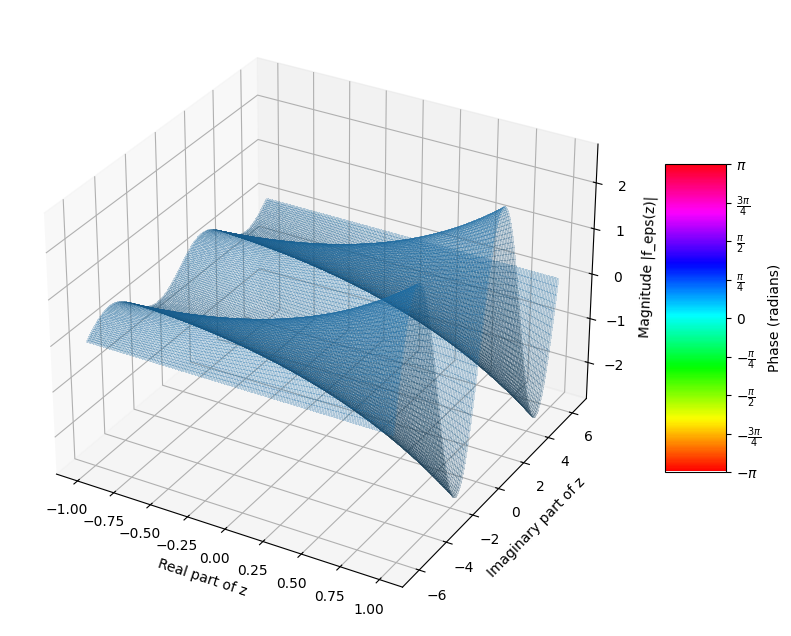

In [9]:
# %matplotlib ipympl
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv
res = 200

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-1, 1, res)  # Real part
y = np.linspace(-2*np.pi, 2*np.pi, res)  # Imaginary part
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = exp_z(Z)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax.plot_surface(X, Y, im_exp_xy(X, Y), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax.set_xlabel('Real part of z')
ax.set_ylabel('Imaginary part of z')
ax.set_zlabel('Magnitude |f_eps(z)|')

# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label="Phase (radians)")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)


plt.show()


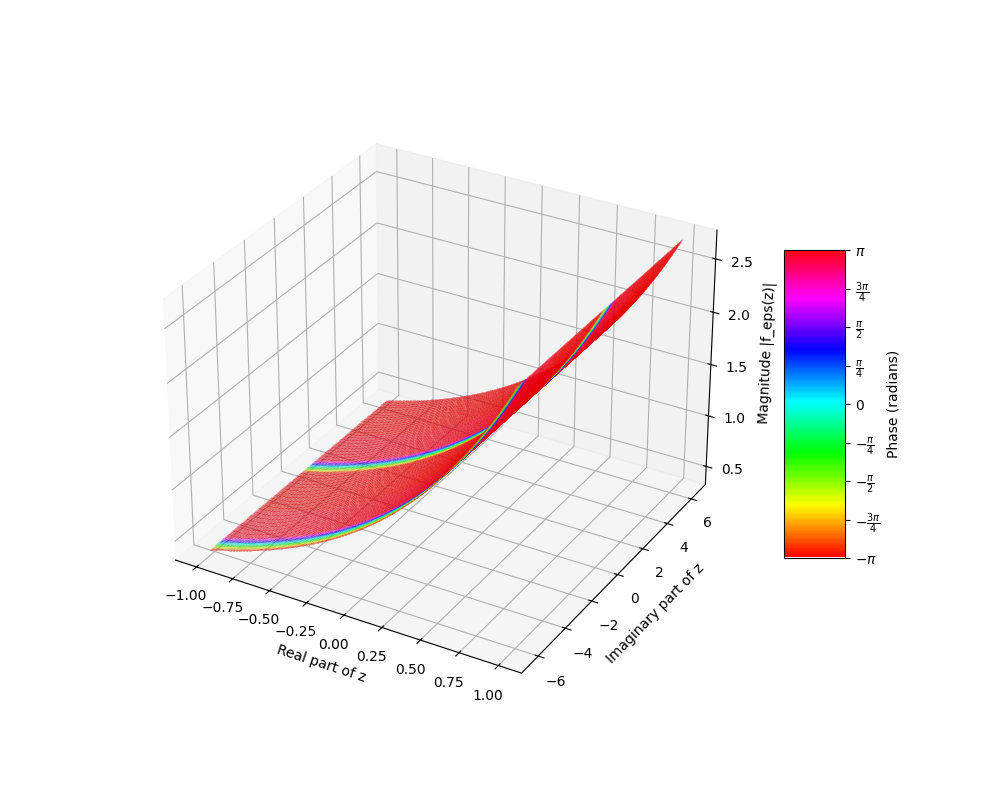

In [7]:
# %matplotlib ipympl
# cmap = plt.cm.twilight
# cmap = plt.cm.viridis
cmap = plt.cm.hsv
res = 200

# Create a meshgrid of complex numbers in the complex plane
x = np.linspace(-1, 1, res)  # Real part
y = np.linspace(-2*np.pi, 2*np.pi, res)  # Imaginary part
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Complex plane

# Compute the function values on the grid
W = exp_z(Z)

# Magnitude (for height) and phase (for color)
magnitude = np.abs(W)
phase = np.angle(W)

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using magnitude as the z-axis
surf = ax.plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

# Set axis labels
ax.set_xlabel('Real part of z')
ax.set_ylabel('Imaginary part of z')
ax.set_zlabel('Magnitude |f_eps(z)|')

# Add a color bar to map the color to the phase
# Create a mappable object to generate the color bar
norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create mappable with norm
mappable.set_array(phase)  # Set the phase array

# Adding the color bar
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label="Phase (radians)")  # Use mappable to create color bar
cbar.set_ticks(
    np.arange(
        -np.pi,
        5*np.pi/4,
        np.pi/4
    )
)
cbar.set_ticklabels(
    [
        r"$-\pi$",
        r"$-\frac{3\pi}{4}$",
        r"$-\frac{\pi}{2}$",
        r"$-\frac{\pi}{4}$",
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$"
    ]
)


plt.show()
